# Model testing

In [1]:
# Test a particular model on a test image
# ! wget https://cdn.pixabay.com/photo/2018/10/01/12/28/skunk-3716043_1280.jpg -O skunk.jpg
import json
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
# from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# ip install 

In [3]:
image_transforms = { 
    'train': transforms.Compose([
        transforms.Resize(size=256),
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [4]:
 def computeTestSetAccuracy(model, loss_criterion):
    '''
    Function to compute the accuracy on the test set
    Parameters
        :param model: Model to test
        :param loss_criterion: Loss Criterion to minimize
    '''

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    test_acc = 0.0
    test_loss = 0.0

    # Validation - No gradient tracking needed
    with torch.no_grad():

        # Set to evaluation mode
        model.eval()

        # Validation loop
        for j, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Compute the total loss for the batch and add it to valid_loss
            test_loss += loss.item() * inputs.size(0)

            # Calculate validation accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to valid_acc
            test_acc += acc.item() * inputs.size(0)

            print("Test Batch number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

    # Find average test loss and test accuracy
    avg_test_loss = test_loss/test_data_size 
    avg_test_acc = test_acc/test_data_size

    print("Test accuracy : " + str(avg_test_acc))


In [5]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']


    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        print(idx_to_class)
        topk, topclass = ps.topk(3, dim=1)
        print(topclass)
        print(topk)
        # topk, topclass = ps.topk(3, dim=1)
        cls = idx_to_class[topclass.cpu().numpy()[0][0]]
        score = topk.cpu().numpy()[0][0]

        for i in range(3):
            print("Predcition", i+1, ":", idx_to_class[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])
            print(idx_to_class[topclass.cpu().numpy()[0][i]])
            #這裡的輸出值，會有F110=F女性  M=男性 110  表示11歲0個月  115 表示11歲6個月 0.5*12=6個月
            # F095=女性9歲6個月



{0: '女性6歲前', 1: '女性7歲0月', 2: '女性7歲6月', 3: '女性8歲6月', 4: '女性9歲0月', 5: '女性9歲6月', 6: '女性10歲0月', 7: '女性10歲6月', 8: '女性11歲0月', 9: '女性11歲6月', 10: '女性12歲0月', 11: '女性12歲6月', 12: '女性13歲0月', 13: '女性13歲6月', 14: '女性14歲0月', 15: '女性16歲'}
tensor([[4, 8, 5]], device='cuda:0')
tensor([[0.2513, 0.2488, 0.1984]], device='cuda:0')
Predcition 1 : 女性9歲0月 , Score:  0.2513424
女性9歲0月
Predcition 2 : 女性11歲0月 , Score:  0.24878754
女性11歲0月
Predcition 3 : 女性9歲6月 , Score:  0.19841477
女性9歲6月


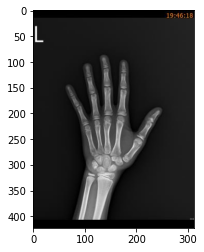

In [6]:

# AI_Data_jsonFile='best_epoch.json'
# idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
# print(idx_to_class)
# idx_to_class={0: 'F060', 1: 'F070', 2: 'F075', 3: 'F085', 4: 'F090', 5: 'F095', 6: 'F100', 7: 'F105', 8: 'F110', 9: 'F115', 10: 'F120', 11: 'F125', 12: 'F130', 13: 'F135', 14: 'F140', 15: '女性16歲'}
idx_to_class={0: '女性6歲前', 1: '女性7歲0月' , 2: '女性7歲6月', 3: '女性8歲6月', 4: '女性9歲0月', 5: '女性9歲6月', 6: '女性10歲0月', 7: '女性10歲6月', 8: '女性11歲0月', 9: '女性11歲6月', 10: '女性12歲0月', 11: '女性12歲6月', 12: '女性13歲0月', 13: '女性13歲6月', 14: '女性14歲0月', 15: '女性16歲'}

# jsonFile = r"f:\SurgeryAnalytics\AI_Cases\Dentistry\1_Linknet_efficientnetb7_0_3\A_Data_preprocessing\Dentistry_config.json"  #讀取剛剛資料分析完輸出的JSION檔



# jsonFile = AI_Data_jsonFile  #讀取剛剛資料分析完輸出的JSION檔
# with open(jsonFile, 'r') as f:
#     config = json.load(f)
# best_epoch=config["best_epoch"]


# best_epoch='3498'
# dataset = 'BoneAge'
# model = torch.load("{}_model_{}.pt".format(dataset, best_epoch))
# model = torch.load(best_epoch)
best_epoch='BoneAge_resnet152_3498_For3500.pth'     #最佳檔案 
# best_epoch='DeepLabV3Plus_dpn131_n2301_0.935_model.pt'
model = torch.load(best_epoch)
predict(model, 'BoneAge/valid/F095/9y6m-F-1015.JPG')
# Load Data from folders
#computeTestSetAccuracy(model, loss_func)   #

{0: '女性6歲前', 1: '女性7歲0月', 2: '女性7歲6月', 3: '女性8歲6月', 4: '女性9歲0月', 5: '女性9歲6月', 6: '女性10歲0月', 7: '女性10歲6月', 8: '女性11歲0月', 9: '女性11歲6月', 10: '女性12歲0月', 11: '女性12歲6月', 12: '女性13歲0月', 13: '女性13歲6月', 14: '女性14歲0月', 15: '女性16歲'}
tensor([[15, 13,  9]], device='cuda:0')
tensor([[0.5978, 0.1810, 0.1040]], device='cuda:0')
Predcition 1 : 女性16歲 , Score:  0.5978015
女性16歲
Predcition 2 : 女性13歲6月 , Score:  0.18104297
女性13歲6月
Predcition 3 : 女性11歲6月 , Score:  0.103969134
女性11歲6月


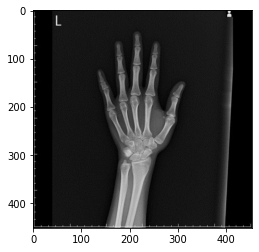

In [7]:
predict(model, 'BoneAge/valid/F160/16y-F-239.png')

{0: '女性6歲前', 1: '女性7歲0月', 2: '女性7歲6月', 3: '女性8歲6月', 4: '女性9歲0月', 5: '女性9歲6月', 6: '女性10歲0月', 7: '女性10歲6月', 8: '女性11歲0月', 9: '女性11歲6月', 10: '女性12歲0月', 11: '女性12歲6月', 12: '女性13歲0月', 13: '女性13歲6月', 14: '女性14歲0月', 15: '女性16歲'}
tensor([[14, 12, 13]], device='cuda:0')
tensor([[0.2730, 0.1399, 0.1391]], device='cuda:0')
Predcition 1 : 女性14歲0月 , Score:  0.27295887
女性14歲0月
Predcition 2 : 女性13歲0月 , Score:  0.13993219
女性13歲0月
Predcition 3 : 女性13歲6月 , Score:  0.13908176
女性13歲6月


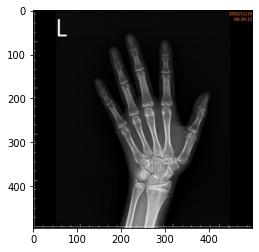

In [8]:
predict(model, 'BoneAge/test/F140/14y-F-124.png')

{0: '女性6歲前', 1: '女性7歲0月', 2: '女性7歲6月', 3: '女性8歲6月', 4: '女性9歲0月', 5: '女性9歲6月', 6: '女性10歲0月', 7: '女性10歲6月', 8: '女性11歲0月', 9: '女性11歲6月', 10: '女性12歲0月', 11: '女性12歲6月', 12: '女性13歲0月', 13: '女性13歲6月', 14: '女性14歲0月', 15: '女性16歲'}
tensor([[13, 12, 11]], device='cuda:0')
tensor([[0.5081, 0.3212, 0.1054]], device='cuda:0')
Predcition 1 : 女性13歲6月 , Score:  0.50808007
女性13歲6月
Predcition 2 : 女性13歲0月 , Score:  0.3212067
女性13歲0月
Predcition 3 : 女性12歲6月 , Score:  0.105392665
女性12歲6月


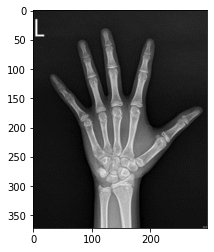

In [9]:
predict(model, 'BoneAge/test/F135/13y6m-F-8.png')